In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [35]:
# Read in data to train with
data = pd.read_csv('~/Downloads/FINRES.csv', dtype={'LOT_ID_BASE': str})

In [36]:
# Randomly split the data into test and train sets
train, test = model_selection.train_test_split(data)

In [37]:
# What percentage of the trains set is not Fin Res?
len(train[train.is_FinRes == 0])/len(train)

0.8051044083526682

In [39]:
# What percentage of the test set is not Fin Res?
len(test[test.is_FinRes == 0])/len(test)

0.8055555555555556

In [45]:
# Now separate the x and y values for train and test
X_train = train[["is_FQD5", "is_PM2"]]
Y_train = train["is_FinRes"]
X_test = test[["is_FQD5", "is_PM2"]]
Y_test = test["is_FinRes"]

In [46]:
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
# print out the classification report
print(metrics.classification_report(Y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.81      1.00      0.89       116
          1       0.00      0.00      0.00        28

avg / total       0.65      0.81      0.72       144



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


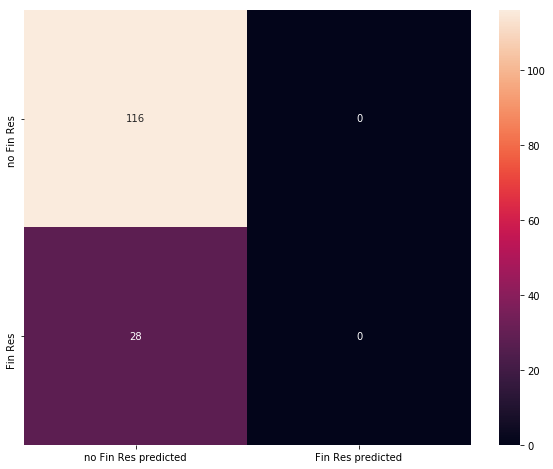

In [52]:
# Show the confusion matrix
conf_matrix = metrics.confusion_matrix(Y_test, clf.predict(X_test))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True,
            fmt='',
            xticklabels =["no Fin Res predicted", "Fin Res predicted"],
            yticklabels =["no Fin Res", "Fin Res"])
plt.show()

In [55]:
clf = LogisticRegression()
clf.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
# print out the classification report
print(metrics.classification_report(Y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.81      1.00      0.89       116
          1       0.00      0.00      0.00        28

avg / total       0.65      0.81      0.72       144



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


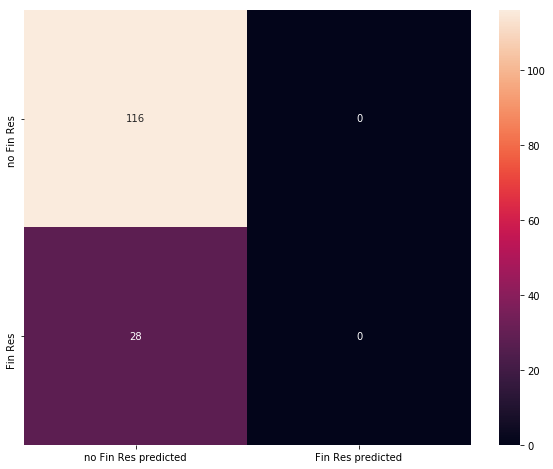

In [57]:
# Show the confusion matrix
conf_matrix = metrics.confusion_matrix(Y_test, clf.predict(X_test))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True,
            fmt='',
            xticklabels =["no Fin Res predicted", "Fin Res predicted"],
            yticklabels =["no Fin Res", "Fin Res"])
plt.show()

In [59]:
clf.coef_

array([[0.46330095, 0.52370387]])